The ARIMA (AutoRegressive Integrated Moving Average) model is a popular statistical method used for time series forecasting. It’s particularly effective when working with univariate time series data, where you predict future values based on past observations. Here's a breakdown of its components:

AR (AutoRegressive) part: This refers to the relationship between an observation and a specified number of lagged observations (previous time points). It models the dependency between an observation and a number of previous observations.

I (Integrated) part: This component involves differencing the time series data to make it stationary, which means that its statistical properties (like mean and variance) do not change over time. The differencing process helps to remove trends or seasonal patterns in the data.

MA (Moving Average) part: This models the relationship between an observation and a residual error from a moving average model applied to lagged observations. In other words, it accounts for the noise or irregularities in the data.

p-- is the number of lag observations in the model (AR part).
d-- is the number of differencing steps required to make the series stationary (I part).
q-- is the size of the moving average window (MA part).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('stockmarket.csv')
pd.set_option('display.max_columns',None)

In [4]:
df.shape

(4083, 7)

In [5]:
df.isnull().sum()

date               0
open               0
high               0
low                0
close              0
volume             0
dividend_amount    0
dtype: int64

In [6]:
df.head()

,date,open,high,low,close,volume,dividend_amount
0,2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0
1,2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0
2,2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0
3,2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0
4,2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0


In [7]:
df.tail()

,date,open,high,low,close,volume,dividend_amount
4078,2021-07-26,2110.0000,2121.6001,2071.70,2077.70,378150.0,0.0
4079,2021-07-27,2079.0000,2083.5000,2041.20,2054.30,271432.0,0.0
4080,2021-07-28,2060.1001,2060.1499,2016.60,2036.85,207230.0,0.0
4081,2021-07-29,2050.0000,2074.3999,2043.75,2055.25,142646.0,0.0
4082,2021-07-30,2055.2500,2068.1499,2030.40,2035.40,228312.0,0.0


In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

date                object
open               float64
high               float64
low                float64
close              float64
volume             float64
dividend_amount    float64
dtype: object

In [10]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,open,high,low,close,volume,dividend_amount
date,,,,,,
2005-01-03,388.7685,407.0464,388.7685,405.9997,11842921.0,0.0
2005-01-04,399.9444,407.3827,395.8329,396.8048,10059943.0,0.0
2005-01-05,392.8427,399.1970,385.9277,396.1319,16954266.0,0.0
2005-01-06,392.4690,401.0658,390.6747,393.1791,13446517.0,0.0
2005-01-07,394.7115,409.2889,394.3751,404.3176,16969845.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


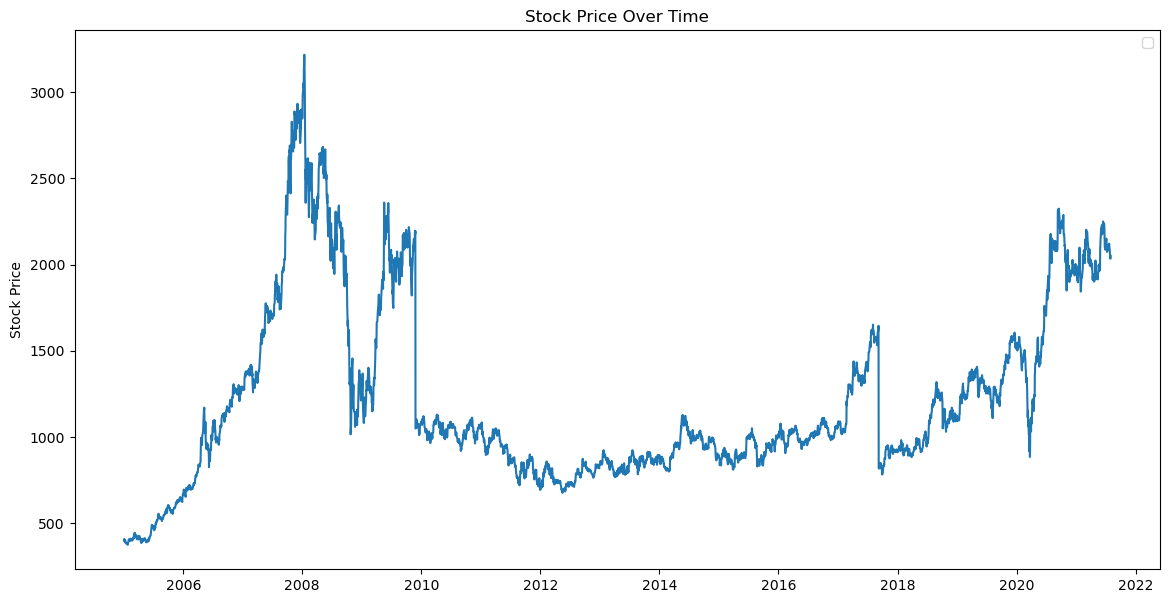

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(df['close'])
plt.title("Stock Price Over Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [12]:
df['20']=df['close'].rolling(window=20).mean()
df['80']=df['close'].rolling(window=60).mean()

A rolling average (also known as a moving average) is a statistical technique used to analyze time series data by smoothing out short-term fluctuations and highlighting longer-term trends or cycles. The "window" refers to the number of data points that are used to calculate each average.

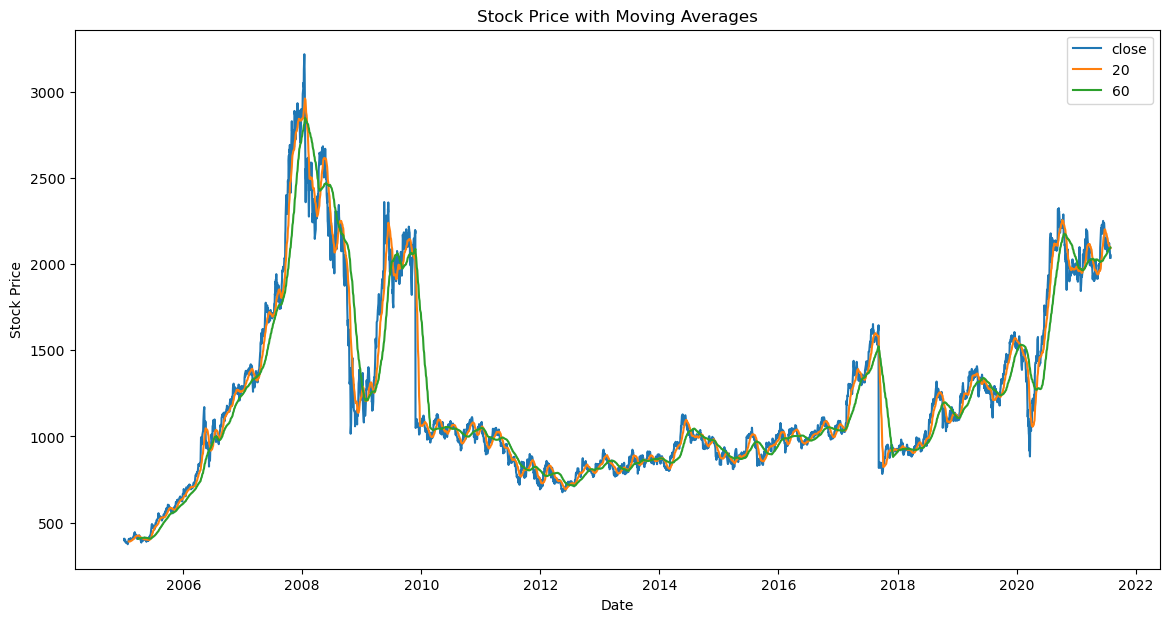

In [13]:
plt.figure(figsize=(14, 7))
plt.plot(df['close'],label='close')
plt.plot(df['20'],label='20')
plt.plot(df['80'],label='60')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

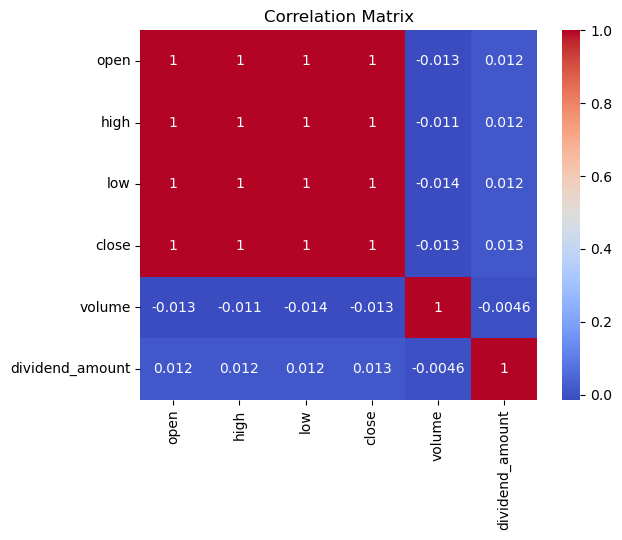

In [14]:
correlation = df[['open','high','low','close','volume','dividend_amount']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [15]:
weekly=df['close'].resample('W').mean()
monthly= df['close'].resample('M').mean()
yearly = df['close'].resample('Y').mean()

C:\Users\jadha\AppData\Local\Temp\ipykernel_1256\614504762.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly= df['close'].resample('M').mean()
C:\Users\jadha\AppData\Local\Temp\ipykernel_1256\614504762.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df['close'].resample('Y').mean()


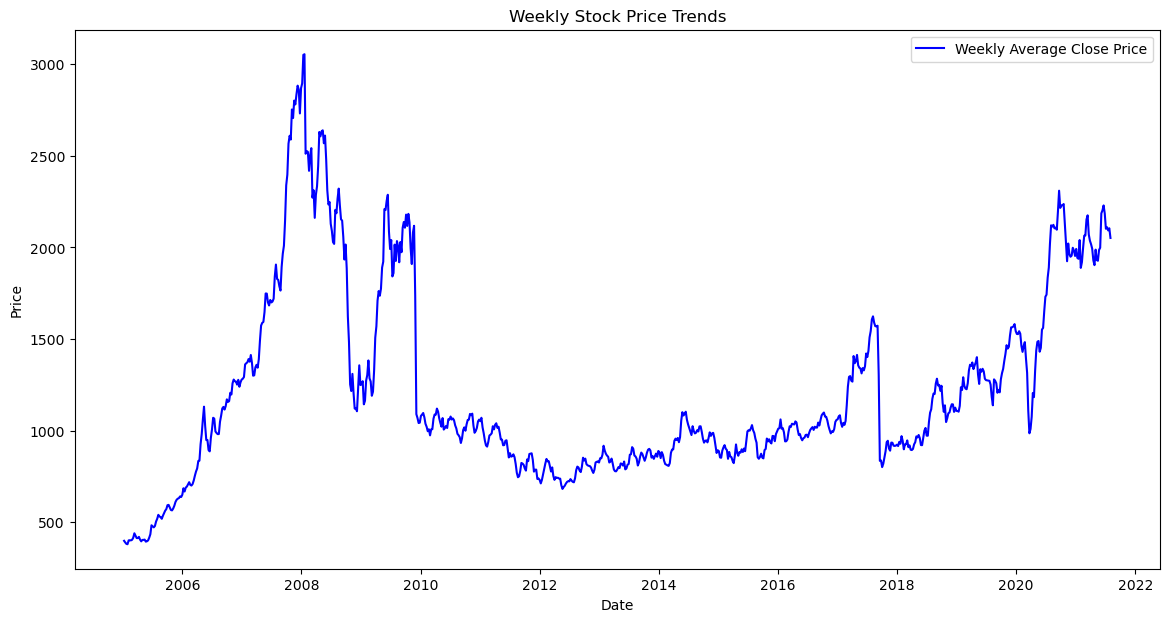

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(weekly, label='Weekly Average Close Price', color='b')
plt.title('Weekly Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


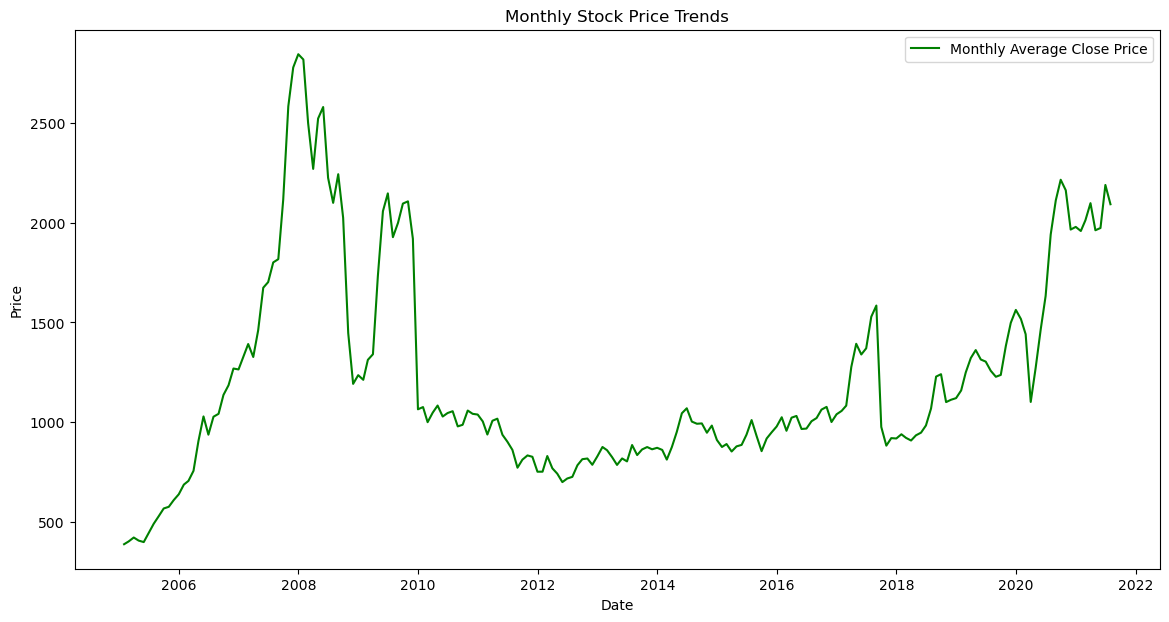

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(monthly, label='Monthly Average Close Price', color='g')
plt.title('Monthly Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

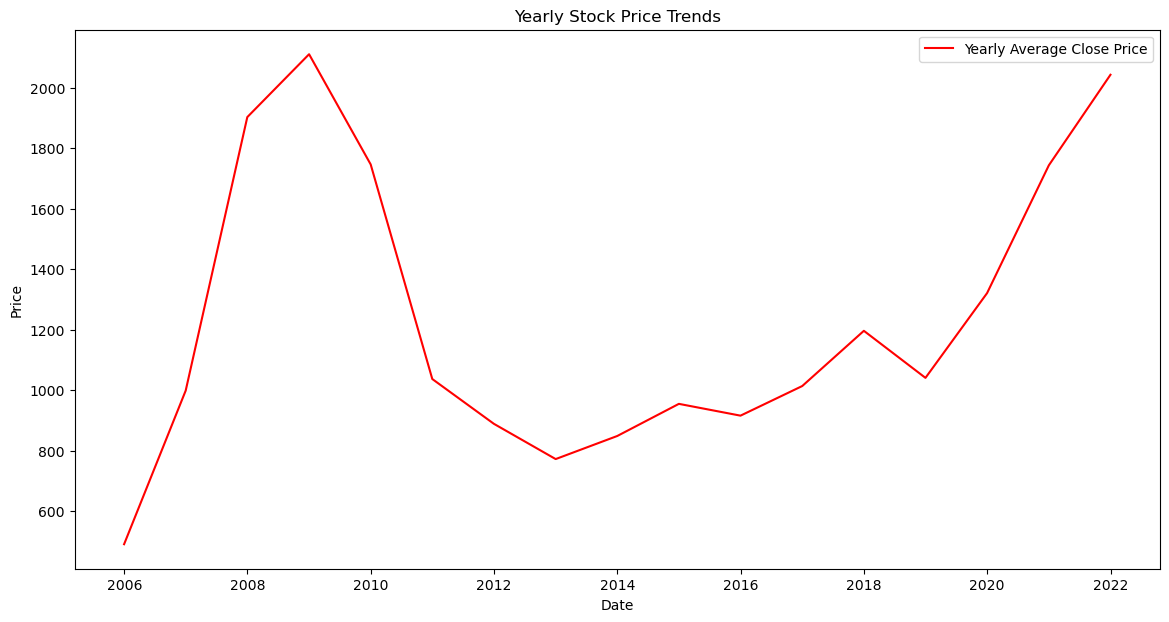

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(yearly, label='Yearly Average Close Price', color='r')
plt.title('Yearly Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

In [19]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
data=df['close']

In [46]:
model = ARIMA(data, order=(1,1,1))
modelfit = model.fit()

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [47]:
next100days=modelfit.forecast(100,aplha=0.05)
next100days

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
e:\Anaconda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['aplha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


4083    2034.671083
4084    2034.650528
4085    2034.649948
4086    2034.649932
4087    2034.649931
           ...     
4178    2034.649931
4179    2034.649931
4180    2034.649931
4181    2034.649931
4182    2034.649931
Name: predicted_mean, Length: 100, dtype: float64